In [1]:
import import_ipynb
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [2]:
dataset = pd.read_csv(r'D:\Binura\SLIIT\3rd year 2nd sem\Fundamentals of Data Mining\Labsheets and tutorials\Practical 04\weather.csv')
print(dataset)

    id   outlook temperature humidity  windy play
0    1     sunny         hot     high  False   no
1    2     sunny         hot     high   True   no
2    3  overcast         hot     high  False  yes
3    4     rainy        mild     high  False  yes
4    5     rainy        cool   normal  False  yes
5    6     rainy        cool   normal   True   no
6    7  overcast        cool   normal   True  yes
7    8     sunny        mild     high  False   no
8    9     sunny        cool   normal  False  yes
9   10     rainy        mild   normal  False  yes
10  11     sunny        mild   normal   True  yes
11  12  overcast        mild     high   True  yes
12  13  overcast         hot   normal  False  yes
13  14     rainy        mild     high   True   no


In [3]:
dataset = pd.DataFrame(data=dataset.iloc[:,1:6].values,columns=["outlook","temperature","humidity","windy","play"])

In [4]:
dataset

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [5]:
le = LabelEncoder()
dataset_encoded = dataset.iloc[:,0:5]
le.fit_transform(dataset_encoded["outlook"])

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [6]:
le = LabelEncoder()
dataset_encoded = dataset.iloc[:,0:5]

for i in dataset_encoded:
    dataset_encoded[i] = le.fit_transform(dataset_encoded[i])
    
print(dataset_encoded)
print(dataset)

    outlook  temperature  humidity  windy  play
0         2            1         0      0     0
1         2            1         0      1     0
2         0            1         0      0     1
3         1            2         0      0     1
4         1            0         1      0     1
5         1            0         1      1     0
6         0            0         1      1     1
7         2            2         0      0     0
8         2            0         1      0     1
9         1            2         1      0     1
10        2            2         1      1     1
11        0            2         0      1     1
12        0            1         1      0     1
13        1            2         0      1     0
     outlook temperature humidity  windy play
0      sunny         hot     high  False   no
1      sunny         hot     high   True   no
2   overcast         hot     high  False  yes
3      rainy        mild     high  False  yes
4      rainy        cool   normal  False  yes
5   

In [7]:
column_names = dataset_encoded.iloc[:,0:4].columns
column_names

Index(['outlook', 'temperature', 'humidity', 'windy'], dtype='object')

In [8]:
#The columns used to make the predictions.Independent variable
x = dataset_encoded.iloc[:,0:4].values
print(x)

[[2 1 0 0]
 [2 1 0 1]
 [0 1 0 0]
 [1 2 0 0]
 [1 0 1 0]
 [1 0 1 1]
 [0 0 1 1]
 [2 2 0 0]
 [2 0 1 0]
 [1 2 1 0]
 [2 2 1 1]
 [0 2 0 1]
 [0 1 1 0]
 [1 2 0 1]]


In [9]:
#columns of data that we want to predict. Dependent variable
y = dataset_encoded.iloc[:,4].values
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [10]:
#split the dataset into training and testing tests
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
#create the decision tree and fit it into the training data
model = DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [12]:
#prediction
model.predict([(0,0,0,0)])

array([1])

In [13]:
#predict the Input of outlook = overcast, temperature = hot, humidity = high, windy = strong --> yes
model.predict([(0,1,0,1)])

array([0])

In [14]:
#calculating the accuracy
model.score(x_test,y_test)

0.6

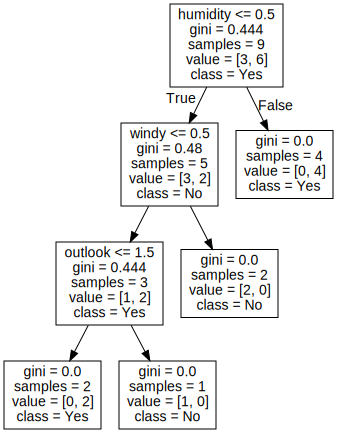

In [15]:
#plot the decision tree
dot_data = tree.export_graphviz(model, out_file="mytree.dot",feature_names=dataset.columns[0:4], class_names=["No","Yes"])
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [16]:
#plot the decision tree
dot_data= tree.export_graphviz(model, feature_names=column_names,class_names=["No","Yes"], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("dtree_render",view=True)

'dtree_render.pdf'